In [27]:
from transformers import pipeline

# 모델 가져오기
classfier = pipeline('text-classification')

# 문제
text = "I've been wating for a HuggingFace course my whole life"

classfier(text)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.8964897394180298}]

In [28]:
from transformers import pipeline

# 감정분석
classfier = pipeline('sentiment-analysis')

classfier([
    "I've been wating for a HuggingFace course my whole life",
    "I hate tihs so much!"
])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.8964897394180298},
 {'label': 'NEGATIVE', 'score': 0.9980971217155457}]

* 제로샷 분류
* Zero-shot : 기계 학습 및 자연어 처리에서 각 개별 작업에 대한 특정요육 없이 작업을 수행할 수 있는 모델 유형

In [29]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# squence_to_classify = 'one day I will see the world'
# squence_to_classify2 = 'This a course about the transformers library'
squence_to_classify = "This course provides valuable insights into the principles and applications of machine learning."

# candidate_lavbels = ['travel','cooking','dancing']
# candidate_lavbels2 = ['cook','business','education']
candidate_lavbels = ['home','business','education']

# classifier(squence_to_classify,candidate_lavbels)
# classifier(squence_to_classify2,candidate_lavbels2)
classifier(squence_to_classify,candidate_lavbels)

{'sequence': 'This course provides valuable insights into the principles and applications of machine learning.',
 'labels': ['home', 'education', 'business'],
 'scores': [0.6292843222618103, 0.23532681167125702, 0.13538892567157745]}

텍스트 생성 (Text Generation)
* 주어진 텍스트 데이터를 기반으로 새로운 텍스트를 생성하는 작업

In [30]:
from transformers import pipeline
generator = pipeline('text-generation','gpt2')
# generator('In this coures, we will teach you how to',pad_token_id = generator.tokenizer.eos_token_id)
generator('go to home',pad_token_id = generator.tokenizer.eos_token_id)

[{'generated_text': 'go to home. He may have a very hard time coming up with a name for himself, but we will just have to hope that this season isn\'t the first time it\'s been said he\'s been asked for an audition.\n\n"Last'}]

**마스크 채우기 모델**
* 텍스트에서 일부 단어를 마스크로 대체하고 이를 채우는 작업

In [31]:
from transformers import pipeline

unmasker = pipeline('fill-mask','distilroberta-base')

unmasker("i'm going to hospital and meet a <mask>",top_k=5)

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.2060806006193161,
  'token': 3299,
  'token_str': ' doctor',
  'sequence': "i'm going to hospital and meet a doctor"},
 {'score': 0.08788839727640152,
  'token': 1441,
  'token_str': ' friend',
  'sequence': "i'm going to hospital and meet a friend"},
 {'score': 0.06839483231306076,
  'token': 9008,
  'token_str': ' nurse',
  'sequence': "i'm going to hospital and meet a nurse"},
 {'score': 0.051201723515987396,
  'token': 27321,
  'token_str': ' psychiatrist',
  'sequence': "i'm going to hospital and meet a psychiatrist"},
 {'score': 0.04677021503448486,
  'token': 16308,
  'token_str': ' surgeon',
  'sequence': "i'm going to hospital and meet a surgeon"}]

In [32]:
from transformers import pipeline

unmasker = pipeline('fill-mask', model = 'bert-base-uncased')

unmasker("hello i'm a [MASK] model.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.10731075704097748,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i ' m a fashion model."},
 {'score': 0.08774492889642715,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i ' m a role model."},
 {'score': 0.053383972495794296,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello i ' m a new model."},
 {'score': 0.046672359108924866,
  'token': 3565,
  'token_str': 'super',
  'sequence': "hello i ' m a super model."},
 {'score': 0.027095895260572433,
  'token': 2986,
  'token_str': 'fine',
  'sequence': "hello i ' m a fine model."}]

In [33]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="FacebookAI/xlm-roberta-base")

pipe("안녕하세요? 나는 <mask> 모델입니다.")

Some weights of the model checkpoint at FacebookAI/xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.05429058149456978,
  'token': 81053,
  'token_str': '자동차',
  'sequence': '안녕하세요? 나는 자동차 모델입니다.'},
 {'score': 0.03555170074105263,
  'token': 56575,
  'token_str': 'Fashion',
  'sequence': '안녕하세요? 나는 Fashion 모델입니다.'},
 {'score': 0.030248744413256645,
  'token': 53226,
  'token_str': '광고',
  'sequence': '안녕하세요? 나는 광고 모델입니다.'},
 {'score': 0.024159586057066917,
  'token': 54543,
  'token_str': 'fashion',
  'sequence': '안녕하세요? 나는 fashion 모델입니다.'},
 {'score': 0.02254818007349968,
  'token': 26084,
  'token_str': '사진',
  'sequence': '안녕하세요? 나는 사진 모델입니다.'}]

In [34]:
from transformers import pipeline

ner = pipeline("ner", "dbmdz/bert-large-cased-finetuned-conll03-english", grouped_entities=True)  # 개체명 인식
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.") 

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity_group': 'PER',
  'score': np.float32(0.9981694),
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': np.float32(0.9796019),
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': np.float32(0.9932106),
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

In [35]:
from transformers import pipeline

ner = pipeline("ner", "dbmdz/bert-large-cased-finetuned-conll03-english", grouped_entities=True)  # 개체명 인식
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.") 

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity_group': 'PER',
  'score': np.float32(0.9981694),
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': np.float32(0.9796019),
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': np.float32(0.9932106),
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

In [36]:
from transformers import pipeline
question_answerer = pipeline("question-answering", "distilbert-base-cased-distilled-squad")  # 질의 응답
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

c:\Users\80406\miniforge3\envs\lecture_env\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\80406\.cache\huggingface\hub\models--distilbert-base-cased-distilled-squad. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.6949770450592041, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [37]:
from transformers import pipeline
summarizer = pipeline("summarization","sshleifer/distilbart-cnn-12-6")  # 요약
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.
    
    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

c:\Users\80406\miniforge3\envs\lecture_env\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\80406\.cache\huggingface\hub\models--sshleifer--distilbart-cnn-12-6. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' China and India graduate six and eight times as many traditional engineers as the U.S. as does the United States . Rapidly developing economies such as India and Europe continue to encourage and advance the teaching of engineering . There are declining offerings in engineering subjects dealing with infrastructure, infrastructure, the environment, and related issues .'}]

In [38]:
from transformers import pipeline
question_answerer = pipeline("question-answering", "distilbert-base-cased-distilled-squad")  # 질의 응답
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

{'score': 0.6949770450592041, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [39]:
!pip install sacremoses

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/897.5 kB ? eta -:--:--
   ---------------------------------------- 897.5/897.5 kB 8.1 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)


In [40]:
from transformers import pipeline

generator = pipeline("text-generation", "gpt2")
generator("In this course, we will teach you how to", pad_token_id=generator.tokenizer.eos_token_id)

[{'generated_text': 'In this course, we will teach you how to configure the Windows Server 2012 R2 Virtual Machine with the latest version of the Windows Server SDK, Windows Update and Windows Server 2008 R2. You will also learn the following: how you can upgrade to'}]

In [41]:
from transformers import pipeline

imagetotext = pipeline("image-to-text", "ydshieh/vit-gpt2-coco-en")
imagetotext("https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png")

config.json:   0%|          | 0.00/4.34k [00:00<?, ?B/s]

c:\Users\80406\miniforge3\envs\lecture_env\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\80406\.cache\huggingface\hub\models--ydshieh--vit-gpt2-coco-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

VisionEncoderDecoderModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


tokenizer_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/211 [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
c:\Users\80406\miniforge3\envs\lecture_env\Lib\site-packages\transformers\generation\utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


[{'generated_text': 'two birds are standing next to each other '}]

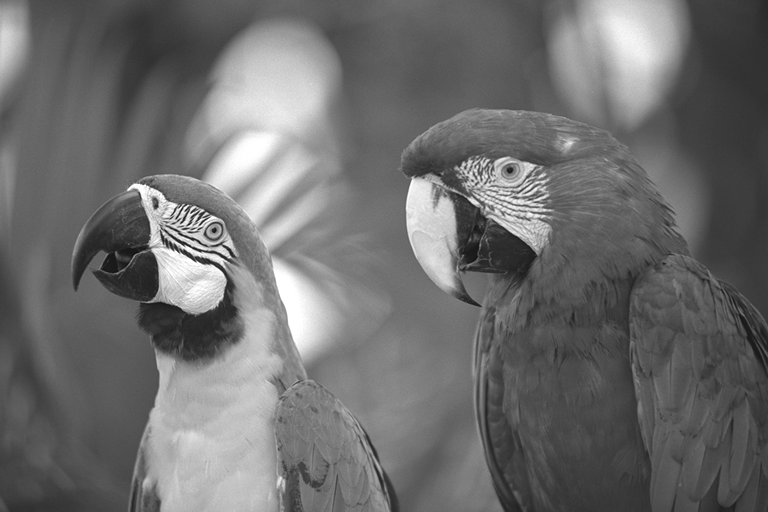

In [42]:
from PIL import Image
import requests
url = 'https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png'
image = Image.open(requests.get(url, stream=True).raw)
image

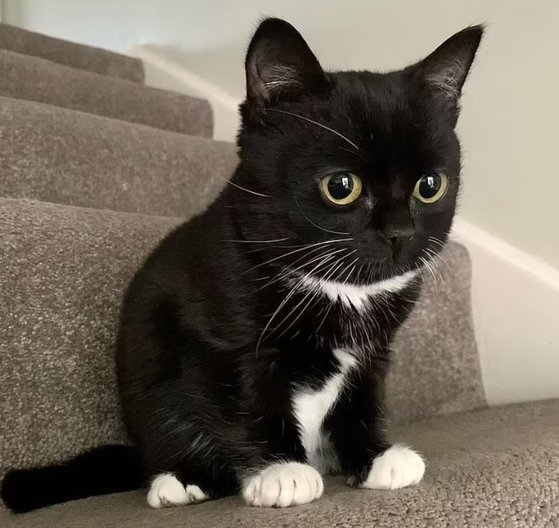

In [43]:
from PIL import Image
import requests
url = 'https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202306/25/488f9638-800c-4bac-ad65-82877fbff79b.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image

In [44]:
!pip install accelerate

In [45]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
classifier(
    "I have a problem with my iphone that needs to be resolved asap!!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5036352872848511,
  0.47880008816719055,
  0.01260011363774538,
  0.002655791351571679,
  0.0023087477311491966]}

**개체명 인식**
* NER(Name Entity Recognition)
* 텍스트에서 사람,위치,조직 등의 객체명을 인식하는 작업


In [46]:
from transformers import pipeline

ner = pipeline("ner","dbmdz/bert-large-cased-finetuned-conll03-englush",grouped_entiries=True)
ner("my name is sylvain and i work at hugging face in brooklyn")

OSError: dbmdz/bert-large-cased-finetuned-conll03-englush is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`